# Budget_Analysis - Question 2
In this Jupyter Notebook we will be using the data provided to determine the pros and cons of join the movie making business based on profits.
## Objective
- Find out what genre makes the most profits
- Is the profit worth the amount invested in movies on average
- Do poupular movies make more profits

## Data Cleaning and EDA

In [1]:
# Import libraries
import sqlite3

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Connect to SQL db
conn = sqlite3.connect('movies_db.sqlite')
cur = conn.cursor()

### budget_df Cleaning and EDA

In [3]:
# Convert sql table to pandas dataframe
budget_df = pd.read_sql('''SELECT *
                                FROM tn_movie_budgets''', conn)
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# Set 'id' as index
budget_df.set_index('id', inplace=True)

In [5]:
# Check for null values
budget_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [6]:
# Check data structure
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [7]:
# Check for duplicates
budget_df[budget_df.duplicated(keep=False)].sort_values(by='movie')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


In [8]:
# Looking at the datatypes the last 3 columns are stored as an object datatype 
# We'll be converting the last 3 columns to Integer datatypes
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$','').str.replace(',','').astype('int')

In [9]:
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$','').str.replace(',','').astype('int')

In [10]:
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int')

In [11]:
# Confirm changes
print(budget_df.info())
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [12]:
# Convert release_date from object dtype to datetime dtype
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

In [13]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [14]:
# create column for release_year
from datetime import datetime
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [15]:
# create another column for movie profit
budget_df['profit'] = ((budget_df['worldwide_gross'] + budget_df['domestic_gross']) - budget_df['production_budget'])
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,3111852904
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,876127750
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-157475300
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1531419831
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1619903129


## Question 1: Do movies make a lot of profit?

### Has the profits on movies increased or decreased over the years?

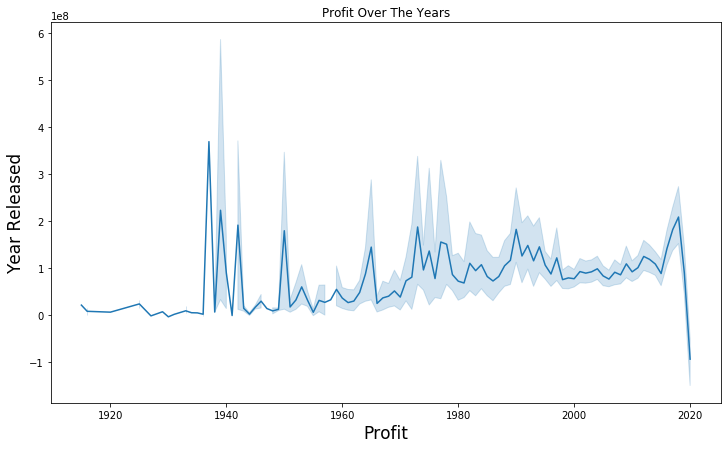

In [16]:
# Use a visulization to answer the question
plt.figure(figsize=(12, 7))
sns.lineplot(x='release_year', y='profit', data=budget_df)
plt.xlabel('Profit', fontsize=17)
plt.ylabel('Year Released', fontsize=17)
plt.title('Profit Over The Years',fontsize=12)
plt.show()

### Has the amount spent on movie productions increased over the years?

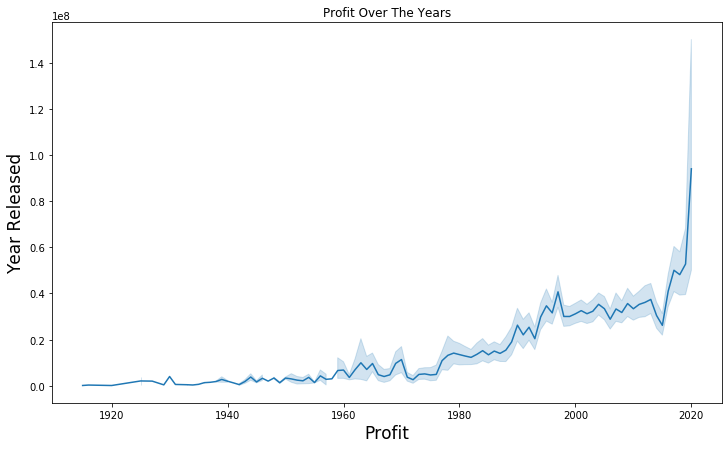

In [33]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='release_year', y='production_budget', data=budget_df)
plt.xlabel('Profit', fontsize=17)
plt.ylabel('Year Released', fontsize=17)
plt.title('Profit Over The Years',fontsize=12)
plt.show()

### Was it worth it?

In [35]:
def P(budget_df):
    if budget_df['profit'] > budget_df['production_budget']:
        val = 'Yes'
    else:
        val = 'No'
    return val

In [39]:
budget_df['Worth_it?'] = budget_df.apply(P, axis=1)
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
id,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,3111852904,Yes
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,876127750,Yes
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-157475300,No
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1531419831,Yes
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1619903129,Yes


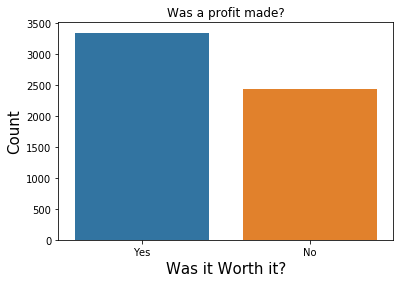

In [45]:
sns.countplot(x='Worth_it?', data=budget_df)
plt.xlabel('Was it Worth it?', fontsize= 15)
plt.ylabel('Count', fontsize=15)
plt.title('Was a profit made?')
plt.show()

## Question 2: Which producing studios make the most profits?

### studio_df Cleaning

In [46]:
# Convert bom_movie_gross to pandas dataframe
studio_df = pd.read_sql('''SELECT *
                                FROM bom_movie_gross''', conn)
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
# View data structure
studio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
# I want to convert the foreign_gross column to a float dtype but it has a lot of null data I do not wish to drop
# To make the transition smooth I will be filling all the null values with 0 temporarily
studio_df['foreign_gross'] = studio_df['foreign_gross'].fillna(value=0)

In [27]:
# Convert foreign_gross from object to int dtype
studio_df['foreign_gross'] = studio_df['foreign_gross'].str.replace('$','').str.replace(',','').astype('float')

In [28]:
# Check to confirm changes 
studio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [29]:
# Fill in 0 place holders with the the columns median value
studio_df['foreign_gross'] = studio_df['foreign_gross'].replace({0: studio_df['foreign_gross'].median()})

In [30]:
studio_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [31]:
studio_df.dropna(inplace=True)

In [32]:
studio_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64